### Is working abroad preferred

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
import math
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud # word cloud

In [3]:
conversion_dic = {
    "gender": "category",
    "department": "category",
    "academic_year": "category",
    "current_residence": "category",
    "study_preference": "category",
    "gpa": "category",
    "sleep_hours": "category",
    "job_search_duration": "category",
    "higher_education": "category",
    "work_style": "category",
    "country_preference": "category",
    "sector_preference": "category",
    "field_preference": "category",
}

df = pd.read_csv("Cleaned Data.csv").astype(conversion_dic)

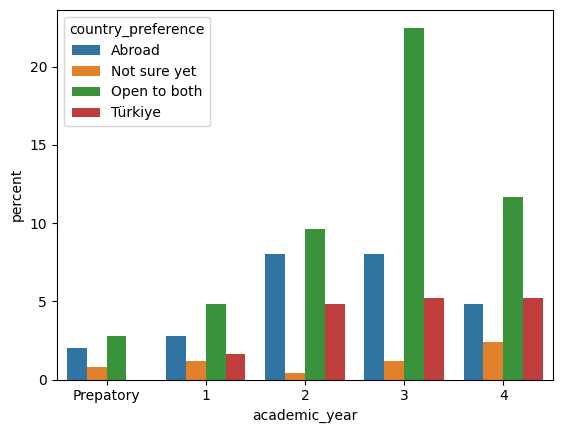

In [17]:
# Raw count
sns.countplot(x="academic_year",
              hue="country_preference",
              order=["Prepatory", "1", "2", "3", "4"],
              data=df)
plt.show()

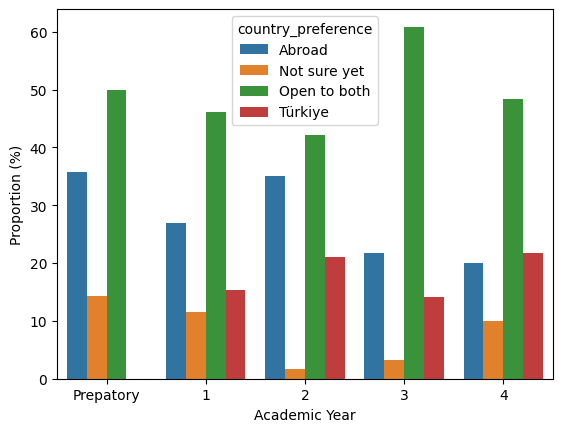

In [41]:
# Proportions
g = df.groupby("academic_year")["country_preference"].value_counts(normalize=True).to_frame(name="prop").reset_index()
g["prop"] = g["prop"] * 100

sns.barplot(x="academic_year",
           y="prop",
           hue = "country_preference",
           order = ["Prepatory", "1", "2", "3", "4"],
            data = g)

plt.xlabel("Academic Year")
plt.ylabel("Proportion (%)")
plt.show()

In [87]:
g["academic_year"] != "Prepatory"

0      True
1      True
4      True
5      True
8      True
9      True
12     True
13     True
16    False
Name: academic_year, dtype: bool

In [90]:
g.loc[(g["count"] != 0) & (g["academic_year"] != "Prepatory"), ]

,academic_year,country_preference,count
0,1,Abroad,7
1,1,Türkiye,4
4,2,Abroad,20
5,2,Türkiye,12
8,3,Abroad,20
9,3,Türkiye,13
12,4,Türkiye,13
13,4,Abroad,12


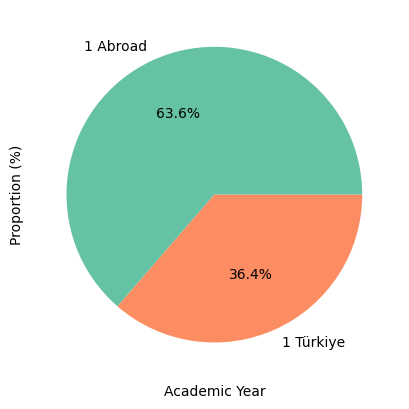

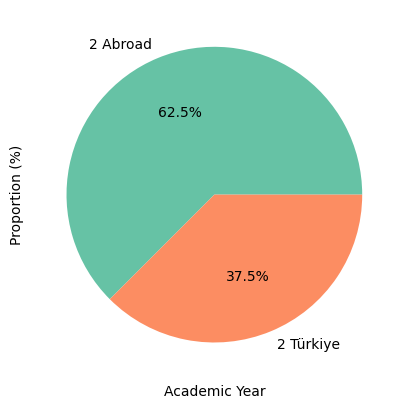

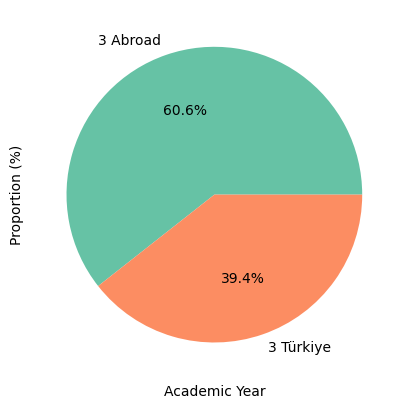

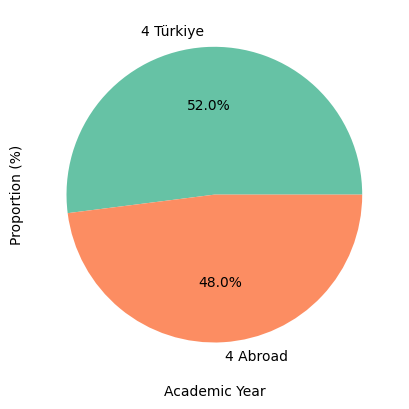

('1', 'Abroad') ('1', 'Türkiye') ('2', 'Abroad') ('2', 'Türkiye') ('3', 'Abroad') ('3', 'Türkiye') ('4', 'Türkiye') ('4', 'Abroad')
0      7
1      4
4     20
5     12
8     20
9     13
12    13
13    12
Name: count, dtype: int64


['1 Abroad',
 '1 Türkiye',
 '2 Abroad',
 '2 Türkiye',
 '3 Abroad',
 '3 Türkiye',
 '4 Türkiye',
 '4 Abroad']

In [110]:
# Sadece Turkiye ve abroad proportions
s = df.loc[df["country_preference"].isin(["Türkiye", "Abroad"]), ]
g = s.groupby("academic_year")["country_preference"].value_counts().to_frame(name="count").reset_index()
g = g.loc[(g["count"] != 0) & (g["academic_year"] != "Prepatory"), ]
counts = g["count"]
label = zip(g.academic_year, g.country_preference)
l = [y + " " + cp for y, cp in zip(g.academic_year, g.country_preference)]

for i in range(0, 8, 2):
    plt.pie(x=counts[i:i+2],
           labels=l[i:i+2],
            colors=sns.color_palette('Set2'),
           autopct='%1.1f%%')
    
    plt.xlabel("Academic Year")
    plt.ylabel("Proportion (%)")
    plt.show()
    

### 4. senede Turkiye orani daha fazla oluyor. Acaba 1. ve 4. sinif arasindaki bu fark significant mi?

Test edelim:

In [127]:
test_df = df.groupby("academic_year")["country_preference"].value_counts(normalize=True).to_frame(name="prop").reset_index()
test_df = test_df.loc[test_df["academic_year"].isin(["1", "4"]) & (test_df["country_preference"] == "Türkiye"), ]

year_1_prop = test_df.iloc[0, 2] # 15.38%
year_2_prop = test_df.iloc[1, 2] # 21.67%



0.15384615384615385

### Estimate the total proportion of Engineering students that have decided to remain in Turkiye

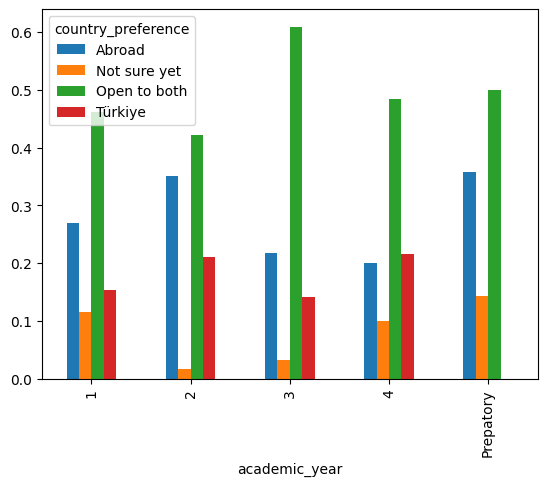

In [8]:
freq_table = pd.crosstab(df["academic_year"], df["country_preference"], normalize="index") # yukaridaki pivot table yerine su crosstab da olur galiba
# ayni zamanda proportion veriiyor baya iyi.

freq_table.plot(kind="bar")
plt.show()